# Download and explore dataset

### Context :
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Inspiration:
Identify fraudulent credit card transactions.

for more info, visit https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import kaggle
import os 

os.system('kaggle datasets download -d mlg-ulb/creditcardfraud')

0

In [2]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [1]:
import pandas as pd

df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


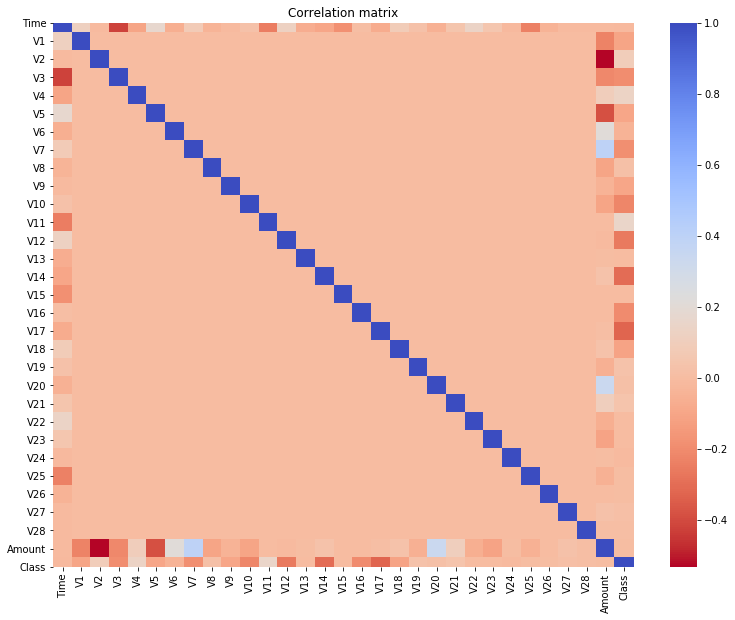

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
fig, ax = plt.subplots(figsize=(13,10))
plt.title('Correlation matrix')
sns.heatmap(corr, cmap='coolwarm_r')
plt.show()

In [3]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0 as normal, 1 as a fraudulent transaction. The distribution is heavily skewed towards class 0. Also, one can see from correlation matrix and sample mean, standard deviation, the data has already been PCA processed, so the features are lineary independent and normalized.

# Develop supervised baseline model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

# important to use cross-k fold validation to access accurately for model performance
kf = KFold(n_splits=3, shuffle=True)

cross_val_test_acc = []
for train_ind, test_ind in kf.split(X):
    clf = LogisticRegression(C=10, random_state=0, max_iter=1000)
    
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = y[train_ind], y[test_ind]
    
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    cross_val_test_acc.append(accuracy_score(y_test, y_pred))

cross_val_test_accuracy = np.mean(cross_val_test_acc)
print('Cross validation test accuray: {:.4f}'.format(cross_val_test_accuracy))

Cross validation test accuray: 0.9991


The accuracy is not surprisingly high for this skewed dataset since if one were to guess all 1s, he would already archieve 99.8% accuracy. Therefore, accuracy is not a meaningful metric.

Confusion matrix:


,Predicted: 0,Predicted: 1
Actual: 0,94747,21
Actual: 1,58,109


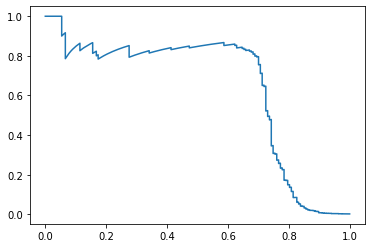

In [6]:
# precision-recall curve instead of ROC AUC since the latter is sensitive to small sample size of skewed class
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from IPython.display import display

# to use precision recall metric, different threshold for the prob of predicted classes are used instead
y_scores = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)
confusion_df = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
display(pd.DataFrame(confusion_df, index=['Actual: 0', 'Actual: 1'], columns=['Predicted: 0', 'Predicted: 1']))

precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:, 1])

import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.show()

In [7]:
# to summarize the quality of our classifier
from sklearn import metrics

pr_auc = metrics.auc(recall, precision)
print('Precision-recall area under curve: {:.4f}'.format(pr_auc))

Precision-recall area under curve: 0.6393


From this perspective, the model is actually not doing a good job at classifying between fraud and non-fraud cases, since a perfect classifier would have a auc score of 1 and its area will cover up to the top right corner, in that case, that auc score would translate to a perfect precision score of 1 (indicating how much of one's predictions are right) and recall score of 1 (indicating how good one can capture the fraudulent cases actually happened).

# Enter SMOTE (Synthetic Minority Over-sampling Technique)
The motivation for SMOTE is not hard to understand, in a supervised algorithm, the loss function is heavily skewed to getting the majority right since by definition, loss function is proportional to the sum of all sample's error. Therefore, no matter how hard the algorithm tries, it will never have enough signal (gradient proposed by the minority class) to learn to classify the minority class.

In essence, what SMOTE does is to upsample the minority class to make the dataset balance, by doing so, one can expect an improvement in pr-auc score.

How SMOTE achieve this is, for each data point from the minority class, taking its k-nearest neighbors, this forms k pairs of vectors, based on how many upsampling is needed (in imblearn SMOTE implementation, if ratio == 'auto', it will upsample the minority class until the no. of data pts is equal to the majority class), a random number is generated for linearly interpolation between the pair of vectors.

Using TensorFlow backend.


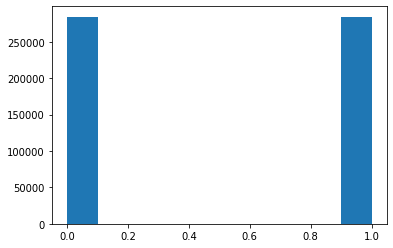

In [8]:
from imblearn.over_sampling import SMOTE

# example of how SMOTE works
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)
plt.hist(y_res)
plt.show()

Now the dataset is balanced.

Be cautious when doing cross validation with synthetic dataset, the synthetic dataset generated from training samples can only be used for training, for assessing the model performance, one have to use the original testing samples. In simple words, train test split happens before SMOTE.

In [9]:
kf = KFold(n_splits=3, shuffle=True)

cross_val_test_acc = []
for train_ind, test_ind in kf.split(X):
    clf = LogisticRegression(C=10, random_state=0, max_iter=1000)
    
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = y[train_ind], y[test_ind]
    
    # SMOTE happens before validation to avoid clf has already seen the test set
    sm = SMOTE(random_state=0)
    X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
    
    y_pred = clf.fit(X_train_balanced, y_train_balanced).predict(X_test)
    cross_val_test_acc.append(accuracy_score(y_test, y_pred))

cross_val_test_accuracy = np.mean(cross_val_test_acc)
print('Cross validation test accuray: {:.4f}'.format(cross_val_test_accuracy))

Cross validation test accuray: 0.9720


The test accuracy dropped but does it mean it is doing a worse job ? wait and see, like mentioned previously, accuracy metric is not meaningful for such a skewed dataset.

Confusion matrix:


,Predicted: 0,Predicted: 1
Actual: 0,91637,3133
Actual: 1,17,148


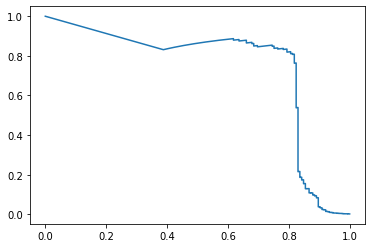

Precision-recall area of test set under curve: 0.7421


In [24]:
y_scores = clf.predict_proba(X_test) 

confusion_df = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
display(pd.DataFrame(confusion_df, index=['Actual: 0', 'Actual: 1'], columns=['Predicted: 0', 'Predicted: 1']))

precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:, 1])
plt.plot(recall, precision)
plt.show()

pr_auc = metrics.auc(recall, precision)
print('Precision-recall area of test set under curve: {:.4f}'.format(pr_auc))

Using SMOTE, one can see the accuracy decreased but that is normal, because that reveals the actual difficulty of classifying a fraudulent claim. And from the pr-auc score, it is now proved the classifier indeed learned much better to classify between fraud and normal transaction.

The rest of the problem remaining how to choose a 'good' threshold.

# Choosing a appropriate threshold for a classifier

Depending on what the costs for tp, fp, tn, fn are the threshold for models can vary rather drastically in a real situation. Say like in a cancer diagnosis scenario, the doctor does not want to afford mistreating a health person and also does not want miss curing a patient who actually have cancer. However, the cost for mistreating a person is much higher than just miss curing a patient. Therefore, one would like to weight precision more heavily. If one is indifferent, one can use F1-score to balance them, F1-score is defined as a harmonic mean between precision and recall. Comparing arithmetic to harmonic mean, the latter penalize more when 2 numbers deviate from each other more.

In [11]:
a = 0.7
b = 0.6
am_c = (a + b)/2
hm_c = (1/a + 1/b)**-1
print('Arithmetic mean for close numbers: {:.4f}'.format(am_c))
print('Harmonic mean for close numbers: {:.4f}\n'.format(hm_c))

a = 0.9
b = 0.3
am_d = (a + b)/2
hm_d = (1/a + 1/b)**-1
print('Arithmetic mean for distant numbers: {:.4f}'.format(am_c))
print('Harmonic mean for distant numbers: {:.4f}\n'.format(hm_c))

print('Change in arithmetic mean = {:.4f}'.format(abs(am_d - am_c)))
print('Change in harmonic mean = {:.4f}'.format(abs(hm_d - hm_c)))

Arithmetic mean for close numbers: 0.6500
Harmonic mean for close numbers: 0.3231

Arithmetic mean for distant numbers: 0.6500
Harmonic mean for distant numbers: 0.3231

Change in arithmetic mean = 0.0500
Change in harmonic mean = 0.0981


In [76]:
# F1 score 
from sklearn.metrics import f1_score
print('F1_score for improved model at classifier\'s default threshold 0.5 : {:.4f}'.format(f1_score(y_test, y_pred)))

F1_score for improved model at classifier's default threshold 0.5 : 0.1446


In [41]:
# using CV again to find the threshold that produces max F1 score since no. of class 0 is so small
kf = KFold(n_splits=3, shuffle=True)

# thresholds to test for
thresholds = np.arange(1, 1001)/1000

from sklearn.metrics import precision_score, recall_score

def precision_recall_by_threshold(y_test, y_scores, thresholds):
    p_ = []
    r_ = []
    for threshold in thresholds:
        y_pred = y_scores.copy()
        y_pred[y_scores >= threshold] = 1
        y_pred[y_scores < threshold] = 0
        
        p = precision_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        
        p_.append(p)
        r_.append(r)
    
    return p_, r_
        
precision_array = np.zeros(len(thresholds))
recall_array = np.zeros(len(thresholds))
for train_ind, test_ind in kf.split(X):
    clf = LogisticRegression(C=10, random_state=0, max_iter=1000)
    
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = y[train_ind], y[test_ind]
    
    sm = SMOTE(random_state=0)
    X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
    
    y_scores = clf.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)
    p_, r_ = precision_recall_by_threshold(y_test, y_scores[:, 1], thresholds)
    
    precision_array += p_
    recall_array += r_
    
# get average precision, recall
avg_precision = precision_array / 3
avg_recall = recall_array / 3

# get max F1 by threshold
def f1(p, r):
    return 2 * (1/p + 1/r) ** -1

max_ind = np.argmax(f1(avg_precision, avg_recall))
print('max F1_score for improved model at classifier\'s threshold {} : {:.4f}'\
      .format(thresholds[max_ind], f1(avg_precision[max_ind], avg_recall[max_ind])))

max F1_score for improved model at classifier's threshold 0.999 : 0.7339


The F1_score above actually is the closest point to the top right corner of Precision Recall graph. The threshold might seen too high but actually makes perfect sense as to achieve a good balance between precision and recall in the case of fraud detection where fraud is so rare, a very high one is needed. But again, this depends on various scenarios since the costs for tp, tn, fn, fp differ drastically in reality. 